refer `crypy_examples/plot/lattice.py`

In [3]:
import crypy as cp
import numpy as np
from matplotlib import pyplot as plt
from crypy_examples.atom_network import (
    draw_atom, 
    draw_bond,
    color_bond,
    color_Se,
    color_Ta,
    r_Se,
    r_Ta,
    r_bond,
    a1,a2,
    p1,p2,p3,p4        
)
from crypy_examples.chiral_interlock import lattice_points_in_hex
from matplotlib.colors import to_rgb

# region Fundamental Parameters
xylim = ((-10,10),(-10,10))

In [7]:
color_Se_HA = [254,164,0]
color_Ta_HA = [0, 176, 240]
color_Se_vesta = [202,137,33]
color_Ta_vesta = [38,115,148]
hexer =  lambda rgb: '#{:02x}{:02x}{:02x}'.format(*rgb)

color_bond rgb: (0.8784313725490196, 0.8784313725490196, 0.8784313725490196)


[]

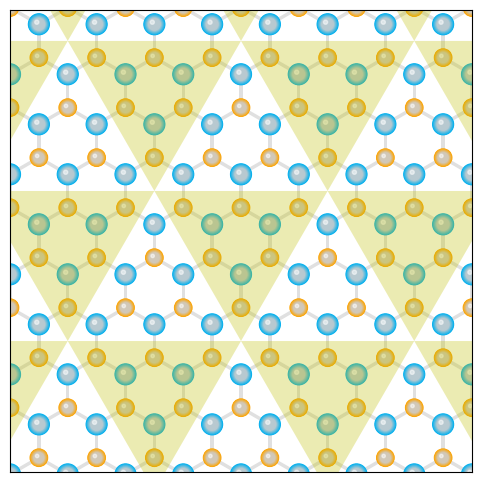

In [ ]:
# region class setup for figure
# region LEVEL 1: ATOMIC LATTICE
pv = cp.PrimitiveVector2D(a1,a2)
bss = cp.Basis2D(pv)
# gen_atom_Ta = lambda x,y: draw_atom(x, y, radius=r_Ta, color_hex=color_Ta)
gen_atom_Ta = lambda x,y: draw_atom(x, y, radius=r_Ta*.6*1.5, color_hex=hexer(color_Ta_HA))
gen_atom_Se = lambda x,y: draw_atom(x, y, radius=r_Se*1.5, color_hex=hexer(color_Se_HA))
gen_bond = lambda x,y: draw_bond(x,y,r=r_bond*.6,facecolor=to_rgb(color_bond))

print("color_bond rgb:",to_rgb(color_bond))
bss.add_artist(gen_bond,(p1,p2),label = 'bond1')
bss.add_artist(gen_bond,(p1,p3),label = 'bond2')
bss.add_artist(gen_bond,(p2,p4),label = 'bond3')
bss.add_artist(gen_atom_Ta,(p1),label='Ta')
bss.add_artist(gen_atom_Se,(p2),label='Se')



lp = cp.LatticePoints2D(pv) 
lp.generate_points_by_xylim(*xylim)
cry = cp.Crystal2D(bss,lp)
# endregion

# region LEVEL 2: CDW 
pv_sup = pv.get_super_structure(3,3)
bss_sup = cp.Basis2D(pv_sup)
gen_CDW = lambda xxx,yyy: plt.fill(xxx,yyy,"y",alpha=.3)
cdw_p1 = (2/3,1/3)
cdw_p2 = (-1/3,1/3)
cdw_p3 = (-1/3,-2/3)
cdw_ps = (cdw_p1,cdw_p2,cdw_p3)
bss_sup.add_artist(gen_CDW,cdw_ps,label='CDW')
lp_sup = cp.LatticePoints2D(pv_sup)   
lp_sup.generate_points_by_xylim(*xylim)
cry_sup = cp.Crystal2D(bss_sup,lp_sup)
gen_domain = lambda x,y:cry_sup.plot_crystal(x,y)
# endregion
# endregion

# region plot
plt.figure(figsize=(6,6))
fig,ax  = cry.plot_crystal()
cry_sup.plot_crystal()
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("D03_CDW_toon2.svg", bbox_inches='tight')
